# BlindCliffWalker comparison of different replay memory sampling strategies

In [7]:
import numpy as np
import pandas as pd
from liftoff.liftoff_results import collect_results

import altair as alt
alt.renderers.enable('notebook')
np.set_printoptions(linewidth=120, precision=3, suppress=True)

In [14]:
?collect_results

In [15]:
experiment_name = 'uni_vs_gpq_ghpq'

result_paths = collect_results(experiment_name=experiment_name,
                               results_dir='../results', 
                               names=['results.msgpack'])
result_paths = [p for p in result_paths if p[1]]

result_data_frames = [pd.read_msgpack(f'{p[0]}/{p[1][0]}') for p in result_paths]

data = pd.concat(result_data_frames, ignore_index=True)
data.sample(10)

,N,mem_size,optim_steps,trial,sampling_type
691,2,6,42,4,greedy-pq
701,4,30,311,7,uniform
782,3,14,145,15,uniform
553,10,2046,20603,13,uniform
143,15,65534,74631,19,greedy-pq
103,14,32766,35493,19,greedy-hpq
672,11,4094,5065,11,greedy-hpq
780,3,14,145,17,uniform
698,2,6,50,14,greedy-pq
772,12,8190,9585,11,greedy-pq


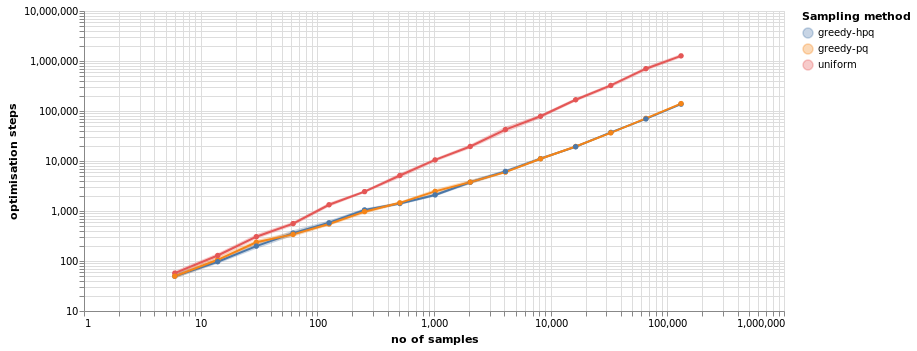

In [19]:
x_axis = alt.X('mem_size', scale=alt.Scale(type='log'), axis=alt.Axis(title='no of samples'))

line = alt.Chart(data).mark_line(point=True).encode(
    x=x_axis,
    y='mean(optim_steps)',
    color=alt.Color('sampling_type', legend=alt.Legend(title="Sampling method")),
    tooltip=['mem_size', 'mean(optim_steps)', 'sampling_type']
)

confidence_interval = alt.Chart(data).mark_area(opacity=0.3).encode(
    x=x_axis,
    y=alt.Y('ci0(optim_steps)', axis=alt.Axis(title='optimisation steps'), scale=alt.Scale(type='log')),
    y2='ci1(optim_steps)',
    color=alt.Color('sampling_type')
)

(confidence_interval + line).interactive().properties(width=700)